In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df=pd.read_csv('clothing_data_processed.csv')

In [3]:
# Compressing records by considering the items which has more than 4 ratings and users who purchased more than 5 items
# Or give rating to more than 5 items

# including items with more than 4 ratings
itemRat_count = pd.DataFrame(df.groupby("item_id")["rating"].count())
itemRat_count = itemRat_count.loc[(itemRat_count["rating"] > 4)]
itemRat_count.reset_index(inplace=True)
#print('itemRat_count')
clothingReduced = df[df["item_id"].isin(itemRat_count["item_id"])]
#print(clothingRed)

In [4]:
# including users with more than 5 purchases
userRat_count = pd.DataFrame(clothingReduced.groupby("user_id")["rating"].count())
userRat_count = userRat_count.loc[(userRat_count.rating > 5)]
userRat_count.reset_index(inplace=True)
userRat_count.drop("rating", axis=1, inplace=True)
clothingReduced = clothingReduced[clothingReduced["user_id"].isin(userRat_count["user_id"])]
clothingReduced.reset_index(inplace=True, drop=True)

In [5]:
from sklearn.model_selection import train_test_split

# In train_test_split, user_id is stratified so same user id appears in the both the training and test test

clothingRed, clothing_test = train_test_split(clothingReduced,test_size=.2, random_state=1017)
print(clothingRed.shape)
print(clothing_test.shape)

(32277, 15)
(8070, 15)




# Content based  using TF-IDF

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove useless words 

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swapnilshevate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Add new column which has  the text data such as category, review summary, review text
# Using this since in the dataset there is no meta data given for items
# Hence creating meta data extracting most of the text data from features 

clothingRed["item_review_text"] = (clothingRed["category"] + " " + clothingRed["review_summary"] + " " + clothingRed["review_text"]).str.lower()
clothingRed["item_review_text"] = clothingRed["item_review_text"].astype(str)
clothingRed["item_review_text"]= clothingRed["item_review_text"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop_words)]))


In [8]:
clothingRed[["item_id", "item_review_text"]].tail()

,item_id,item_review_text
14430,1036336,dress lovely dress fits nice small waste nice ...
11014,1582755,"gown stylist review first all, loved color lux..."
32006,364092,dress sad wear it... absolutely beautiful dres...
25212,401333,shift head turner loved dress received tons co...
8231,330238,"shift loved it! cut large, sits usually flatte..."


In [9]:
agg_item_text = pd.DataFrame(clothingRed.groupby("item_id")["item_review_text"].sum())
agg_item_text.head()

,item_review_text
item_id,
123373,gown dress amazing curves. stunning leg slit. ...
123793,gown gorgeous dress engagement shoot! dress ph...
124204,"dress sequins make light up! dress fit well, g..."
124553,dress great cocktail dress rented backup dress...
125424,dress incredible afraid wear usually wear whit...


In [10]:
tf_idf = TfidfVectorizer()
tf_idf_matrix = tf_idf.fit_transform(agg_item_text["item_review_text"])
item_tfidf_similarity = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
item_tfidf_similarity_df = pd.DataFrame(item_tfidf_similarity, columns=agg_item_text.index, index=agg_item_text.index)

# Create item-item similarity matrix usig td-idf
item_tfidf_similarity_df

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2957481,2958376,2958657,2959486,2960025,2960969,2962646,2963344,2963850,2966087
item_id,,,,,,,,,,,,,,,,,,,,,
123373,1.000000,0.618032,0.444846,0.510188,0.461357,0.602611,0.531132,0.502199,0.441220,0.477559,...,0.131206,0.137484,0.102714,0.138906,0.030582,0.162682,0.063752,0.103066,0.100542,0.102933
123793,0.618032,1.000000,0.564311,0.540431,0.490589,0.683562,0.591036,0.637465,0.494723,0.475404,...,0.148969,0.132423,0.114309,0.158394,0.051961,0.132847,0.058825,0.103882,0.077435,0.096491
124204,0.444846,0.564311,1.000000,0.624467,0.561011,0.438990,0.381691,0.734978,0.327013,0.576425,...,0.131500,0.161013,0.167776,0.149993,0.046859,0.134323,0.054634,0.137048,0.093543,0.078142
124553,0.510188,0.540431,0.624467,1.000000,0.695049,0.529600,0.442628,0.676785,0.384173,0.623449,...,0.163383,0.193587,0.189693,0.180889,0.045254,0.197322,0.093848,0.174188,0.138302,0.076656
125424,0.461357,0.490589,0.561011,0.695049,1.000000,0.447678,0.415259,0.627303,0.371641,0.588868,...,0.170154,0.199379,0.193311,0.184654,0.038900,0.212870,0.077179,0.159841,0.139844,0.060224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960969,0.162682,0.132847,0.134323,0.197322,0.212870,0.141292,0.137927,0.158999,0.100612,0.173798,...,0.106057,0.100706,0.127116,0.110374,0.004856,1.000000,0.086979,0.393640,0.078628,0.135587
2962646,0.063752,0.058825,0.054634,0.093848,0.077179,0.080218,0.074854,0.086358,0.064655,0.073658,...,0.369032,0.054735,0.274979,0.274038,0.012420,0.086979,1.000000,0.043481,0.079559,0.033160
2963344,0.103066,0.103882,0.137048,0.174188,0.159841,0.124028,0.102774,0.130772,0.090459,0.148531,...,0.062530,0.072594,0.044060,0.065835,0.008392,0.393640,0.043481,1.000000,0.067219,0.056401


In [11]:
test=pd.read_csv('test.csv')
test

test_user_ids = test.user_id
uid_list=list(test_user_ids)

d = { 'user_id':492205, 'item_id':208647 }

In [12]:
def tfidf_contentRecSys(d1):
    uid = d1['user_id']
    iid = d1['item_id']
    item_similarities = item_tfidf_similarity_df[[iid]].sort_values([iid], ascending=False, axis=0)[1:]
    d = pd.DataFrame(item_similarities).reset_index()
    items=d.iloc[:,0].values
    similarities = d.iloc[:,1].values
   
    result=pd.DataFrame()
    result['item_id']=items
    result['similarity'] = similarities              
    return result


d2={'user_id': 245559, 'item_id': 1152774}
d3={'user_id': 492205, 'item_id': 208647}
d4={'user_id': 596658, 'item_id': 145906}
d5={'user_id': 362951, 'item_id': 1237908}

tfidf_contentRecSys(d3)

,item_id,similarity
0,1962198,0.441619
1,136110,0.433413
2,547674,0.425500
3,921642,0.425324
4,172027,0.424810
...,...,...
4447,2757736,0.011540
4448,2073279,0.011208
4449,2086116,0.009466
4450,461413,0.005853


In [13]:
tfidf_contentRecSys(d4)

,item_id,similarity
0,131117,0.771983
1,125465,0.746594
2,131533,0.743490
3,168592,0.732401
4,127865,0.719287
...,...,...
4447,2057531,0.019087
4448,2723278,0.016477
4449,2086116,0.012510
4450,2591734,0.012103


# User based collaborative using Kmeans clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

user_item_matx=clothingRed.pivot_table(index='user_id', columns='item_id', values='rating', fill_value=0, aggfunc='count')
print({'Shape:': user_item_matx.shape})

# Compute user-user similarity matrix using cosine 
user_rating_prox = cosine_similarity(user_item_matx, user_item_matx)

# Form clusters 
def k_select(k):
    rating_kmeans = KMeans(n_clusters = k, max_iter = 30, algorithm = "auto", n_init = 30, random_state = 1017).fit(user_rating_prox)
    ssd = {"cluster_n": k, "ssd": rating_kmeans.inertia_}
    return ssd

# Range of number of clusters
k_list=list(range(2,20))
kmean_ssd = pd.DataFrame([k_select(k) for k in k_list])



{'Shape:': (3822, 4453)}


Text(0.5, 1.0, 'Selecte k based on elbow shape')

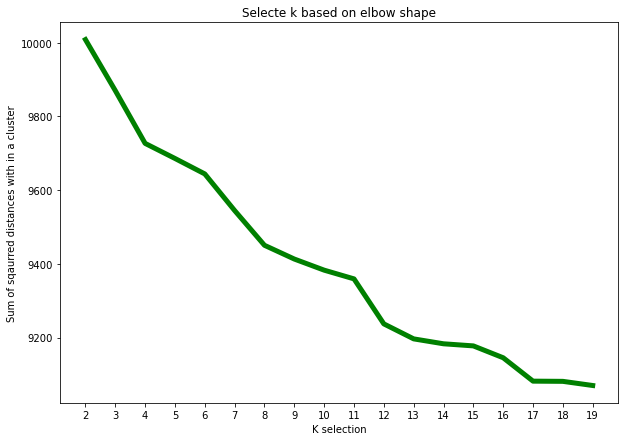

In [15]:
# Plot graph between number of clusters and ssd
plt.figure(figsize=(10, 7))
plt.plot(kmean_ssd["cluster_n"], kmean_ssd["ssd"], color="green", linewidth = 5)
plt.xticks(k_list, k_list)
plt.xlabel("K selection")
plt.ylabel("Sum of sqaurred distances with in a cluster")
plt.title("Selecte k based on elbow shape")

In [16]:
# By looking at graph based on the elbow,  k=13 seems good to select
rating_kmeans = KMeans(n_clusters = 13, max_iter = 60,  algorithm = "auto", n_init = 30, random_state = 1017).fit(user_rating_prox)
rating_kmeans

KMeans(max_iter=60, n_clusters=13, n_init=30, random_state=1017)

In [17]:
# Gives cluster number with corresponding user id
# Users in a specific cluster are similar
user_clusters = pd.DataFrame(rating_kmeans.labels_, columns=["num of users"])
user_clusters


,num of users
0,2
1,2
2,2
3,2
4,1
...,...
3817,2
3818,2
3819,2
3820,2


In [18]:
# Adding extra column consists label as cluster number 
user_item_matx["cluster"] = list(rating_kmeans.labels_)
user_item_matx[["cluster"]].head()


item_id,cluster
user_id,
657,2
1023,2
1089,2
1231,2
1434,1


In [19]:
user_item_matx

item_id,123373,123793,124204,124553,125424,125465,125564,126335,127081,127495,...,2958376,2958657,2959486,2960025,2960969,2962646,2963344,2963850,2966087,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
999183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
999231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [20]:
# https://www.geeksforgeeks.org/python-pandas-melt/
# Melt reshapes the dataframe with id_vars as rows
cluster_items_melt = user_item_matx.melt(id_vars="cluster", value_name="rating")


In [21]:
cluster_items_melt

,cluster,item_id,rating
0,2,123373,0
1,2,123373,0
2,2,123373,0
3,2,123373,0
4,1,123373,0
...,...,...,...
17019361,2,2966087,0
17019362,2,2966087,0
17019363,2,2966087,0
17019364,2,2966087,0


In [22]:
cluster_items_melt.sort_values(["cluster", "rating"], ascending=False, inplace=True)
user_item_matx_cp = user_item_matx.copy()
user_item_matx_cp.reset_index(inplace=True)

,cluster,item_id,rating
8645441,12,1459957,2
8749,12,124204,1
17673,12,125424,1
19497,12,125465,1
20934,12,125465,1
48877,12,128959,1
54613,12,130259,1
106207,12,136110,1
108835,12,136860,1
160601,12,144585,1


In [25]:
def kMeansRec(d1):
    uid = d1['user_id']
    iid = d1['item_id']
    user_cluster = user_item_matx_cp[user_item_matx_cp.user_id == uid]
    user_cluster_ratings = cluster_items_melt[cluster_items_melt.cluster.isin(user_cluster.cluster)][:50]
    result= user_cluster_ratings.item_id.values  
    result=pd.DataFrame(result)
    return result

d={'user_id': 998563, 'item_id': 824029}
kMeansRec(d)

    

,0
0,357231
1,683251
2,789011
3,1000739
4,1013498
5,1123982
6,1314666
7,1384766
8,1384766
9,1448326
